# ML Practicals Code

## Exp 2: Linear Regression

In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
# Importing Dataset
df = pd.read_csv("Automobile.csv")
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [31]:
# Dropping irrelevant tables
df_lr = df.drop(['name','cylinders','displacement','weight','acceleration','model_year','origin'], axis=1)
df_lr.head()

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0


In [32]:
# Preprocessing 
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   horsepower  392 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [33]:
df_lr.isnull().sum()

mpg           0
horsepower    6
dtype: int64

In [34]:
df_lr.dropna(inplace=True, axis=0)
df_lr.isnull().sum()

mpg           0
horsepower    0
dtype: int64

Text(0, 0.5, 'MPG')

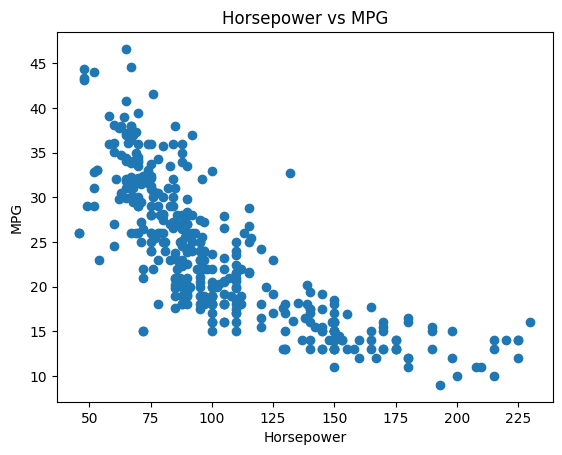

In [35]:
# Visualizing the relation
plt.scatter(df_lr['horsepower'],df_lr['mpg'])
plt.title("Horsepower vs MPG")
plt.xlabel('Horsepower')
plt.ylabel('MPG')

In [52]:
# Training data
x_train, x_test, y_train, y_test = train_test_split(
    df_lr['horsepower'], 
    df_lr['mpg'],
    test_size=.75, 
    shuffle=True, 
    random_state=69)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [55]:
# Creating model
lr = LinearRegression()

# Fitting to model
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
print(f"The score we obtained for the test set is: {lr.score(x_test, y_test)}")

The score we obtained for the test set is: 0.5899096186290432


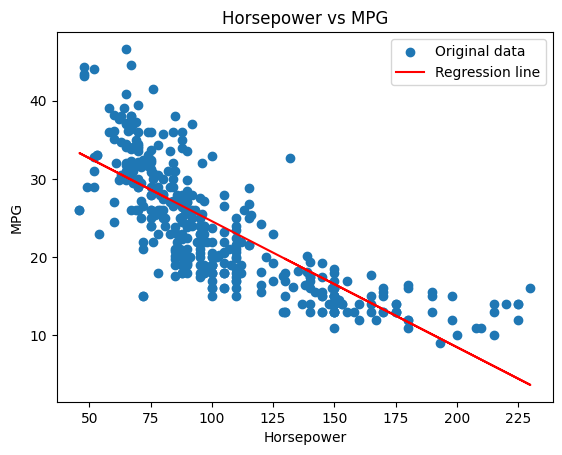

In [63]:
# Visualizing the result
x = np.array(df_lr['horsepower']).reshape(-1,1)
plt.scatter(df_lr['horsepower'],df_lr['mpg'])
plt.plot(df_lr['horsepower'], lr.predict(x), color='red')
plt.title("Horsepower vs MPG")
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend(['Original data','Regression line'])

## Exp 3: Multiple linear regression

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv('Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [98]:
df_lr = df.drop(['name','model_year','origin'], axis=1)
df_lr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [99]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.8 KB


In [100]:
df_lr.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [102]:
df_lr.dropna(inplace=True, axis=0)
df_lr.reset_index(inplace=True)
df_lr.drop('index', inplace=True, axis=1)
df_lr.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

C:\Users\sanya\AppData\Local\Temp\ipykernel_9948\512204221.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


Text(0, 0.5, 'MPG')

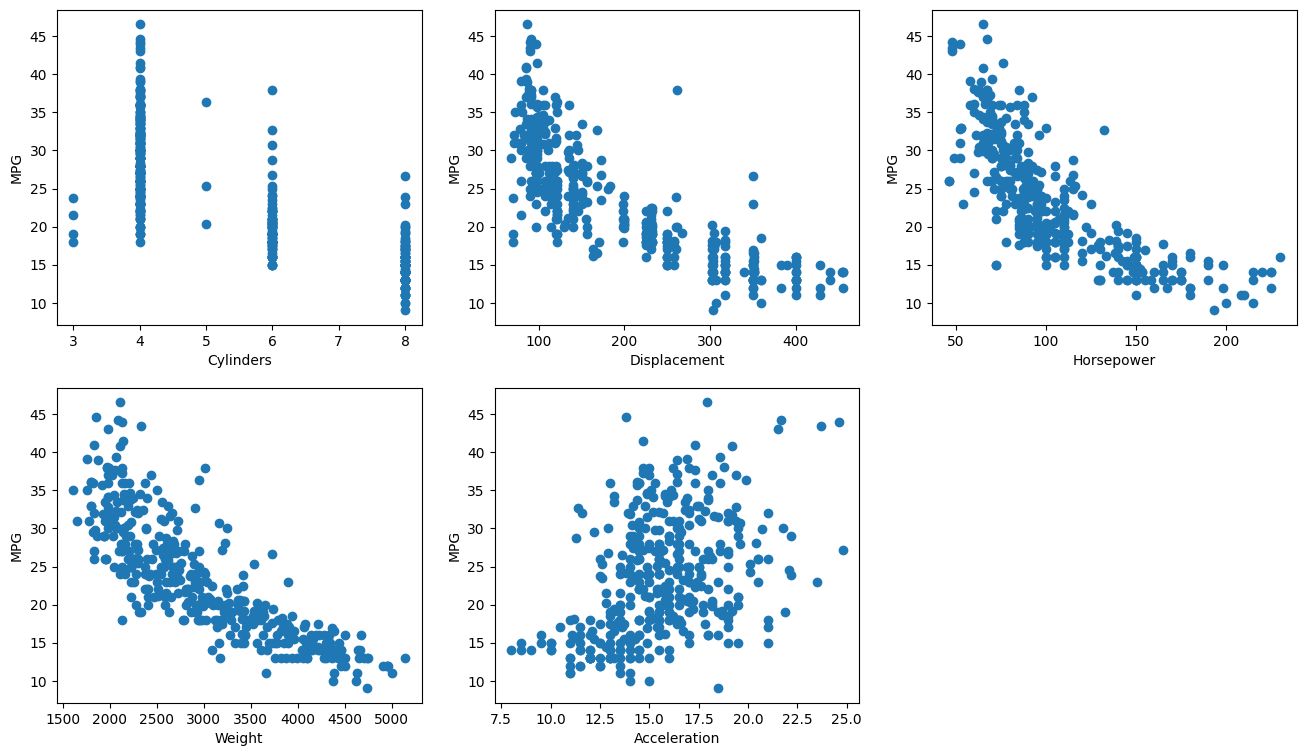

In [112]:
# Visualization of relations
plt.figure(figsize=(16,9))
plt.title("Features vs MPG")

plt.subplot(2,3,1)
plt.scatter(df['cylinders'], df['mpg'])
plt.xlabel("Cylinders")
plt.ylabel("MPG")

plt.subplot(2,3,2)
plt.scatter(df['displacement'], df['mpg'])
plt.xlabel("Displacement")
plt.ylabel("MPG")

plt.subplot(2,3,3)
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel("Horsepower")
plt.ylabel("MPG")

plt.subplot(2,3,4)
plt.scatter(df['weight'], df['mpg'])
plt.xlabel("Weight")
plt.ylabel("MPG")

plt.subplot(2,3,5)
plt.scatter(df['acceleration'], df['mpg'])
plt.xlabel("Acceleration")
plt.ylabel("MPG")

In [106]:
x = df_lr.drop('mpg', axis=1)
y = df_lr['mpg']

In [107]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    train_size=.75, 
    shuffle=True, 
    random_state=69)

In [108]:
# Creating model
lr = LinearRegression()

# Fitting to model
lr.fit(x_train, y_train)

LinearRegression()

In [109]:
print(f"The score we obtained for the test set is: {lr.score(x_test, y_test)}")

The score we obtained for the test set is: 0.7308165433050047


In [125]:
sample_values = np.array([[4, 200, 150, 2222, 10]])
print(f"Predicted MPG is: {lr.predict(sample_values)[0]}")

Predicted MPG is: 25.349195488611493


c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exp 4: Logistic regression

In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Below dataset shows bio-data of various subjects and we have to look for signs of smokers vs non-smokers
df = pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [132]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [133]:
df_copy = df.copy()

In [134]:
x = df_copy.drop(['ID','smoking'], axis=1)
y = df_copy.smoking

In [135]:
print("Unique values for object columns are,")
print(f"Gender:{x.gender.unique()}")
print(f"Oral:{x.oral.unique()}")
print(f"Tartar:{x.tartar.unique()}")

Unique values for object columns are,
Gender:['F' 'M']
Oral:['Y']
Tartar:['Y' 'N']


In [136]:
# Dropping 'oral' column as it has only 1 unique value
# Converting object columns to numeric
x = x.drop(['oral'], axis=1)
x = x.replace({"gender":{'F':1, 'M':0},
                "tartar":{'Y':1, 'N':0}})

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [138]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
y_pred = model.predict(x_test)
print(f"Accuracy of the model is:{accuracy_score(y_test, y_pred)}")

Accuracy of the model is:0.7153245354161055


## Exp 5: KNN classifier

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


### Training

Creating a copy of the dataframe

In [ ]:
train_df_copy = train_df.copy()

In [ ]:
# The following function will tokenize the synopsis text (or any other text)
def tokenize(obj):
    words_list = obj.split(' ')
    return words_list

In [ ]:
train_df_copy['movie_name'] = train_df_copy['movie_name'].apply(tokenize)

In [ ]:
train_df_copy['synopsis'] = train_df_copy['synopsis'].apply(tokenize)

In [ ]:
# Creating a separate column of corpus which will be all the info we have about a movie
train_df_copy['corpus'] = train_df_copy['movie_name'] + train_df_copy['synopsis']

In [ ]:
# Converting list to a string
train_df_copy['corpus'] = train_df_copy['corpus'].apply(lambda x:' '.join(x))

In [ ]:
train_df_copy.head()

,id,movie_name,synopsis,genre,corpus
0,44978,"[Super, Me]","[A, young, scriptwriter, starts, bringing, val...",fantasy,Super Me A young scriptwriter starts bringing ...
1,50185,"[Entity, Project]","[A, director, and, her, friends, renting, a, h...",horror,Entity Project A director and her friends rent...
2,34131,"[Behavioral, Family, Therapy, for, Serious, Ps...","[This, is, an, educational, video, for, famili...",family,Behavioral Family Therapy for Serious Psychiat...
3,78522,"[Blood, Glacier]","[Scientists, working, in, the, Austrian, Alps,...",scifi,Blood Glacier Scientists working in the Austri...
4,2206,"[Apat, na, anino]","[Buy, Day, -, Four, Men, Widely, -, Apart, in,...",action,Apat na anino Buy Day - Four Men Widely - Apar...


In [ ]:
x_train = train_df_copy['synopsis']

In [ ]:
y_train = train_df_copy['genre']

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, lowercase=True)

In [ ]:
# Vectorizing the corpus
x_train_tfidf = tfidf.fit_transform(x_train)

In [ ]:
# Neighbours chosen are 5, we can choose any number
k = 5
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=4)

In [ ]:
knn.fit(x_train_tfidf, y_train)

KNeighborsClassifier(n_jobs=4)

### Singular testing

In [ ]:
test_synopsis = train_df.loc[69, 'synopsis']
test_synopsis

'Several different factions compete in the search for ancient Japanese tablets that have the secret of immortality.'

In [ ]:
test_synopsis_tfidf = tfidf.transform([test_synopsis])

In [ ]:
predicted_genre = knn.predict(test_synopsis_tfidf)[0]
print("Predicted Genre:", predicted_genre)

Predicted Genre: action


## Exp 6: Decision Tree classifier

In [ ]:
# Importing Libraries

from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Reading the csv file
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.size

1200

In [ ]:
df.shape

(200, 6)

### PreProcessing

- X as feature matrix (data)
- Y as response vactor (target)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

- Converting categorical features into numerical features

In [ ]:
from sklearn import preprocessing

In [ ]:
# Using Label Encoder method
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_bp = preprocessing.LabelEncoder()
le_bp.fit(["LOW","NORMAL","HIGH"])
X[:,2] = le_bp.transform(X[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL',"HIGH"])
X[:,3] = le_chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [ ]:
# For 'Y' variable
Y = df[["Drug"]]
Y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


### Setting Up Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
print("X-Train set is:{}".format(X_trainset.shape), "and","Y-Train set is: {}".format(Y_trainset.shape))

X-Train set is:(140, 5) and Y-Train set is: (140, 1)


In [ ]:
print("X_Test set is: {}".format(X_testset.shape),"and","Y_Test set is: {}".format(Y_testset.shape))

X_Test set is: (60, 5) and Y_Test set is: (60, 1)


### Modeling

In [ ]:
drugtree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugtree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Making Predictions

In [ ]:
predtree = drugtree.predict(X_testset)

In [ ]:
print(predtree [0:5])
print(Y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


### Making Evaluations

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy of Decision Tree is:", metrics.accuracy_score(Y_testset, predtree))

Accuracy of Decision Tree is: 0.9833333333333333


### Visualizations

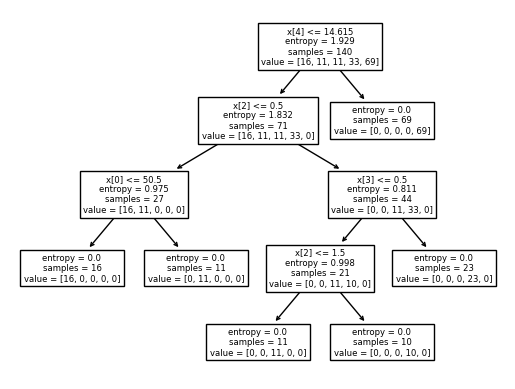

In [ ]:
tree.plot_tree(drugtree)
plt.show()

## Exp 7: Gradient Boosting

### Classification

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [142]:
x, y = load_digits(return_X_y=True)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=69)

In [155]:
gbc = GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=.05, 
    random_state=69, 
    max_features=5)

In [156]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=69)

In [157]:
y_pred = gbc.predict(x_test)
y_pred

array([3, 0, 4, 5, 7, 3, 9, 7, 1, 3, 6, 4, 9, 4, 9, 6, 2, 4, 6, 9, 2, 4,
       3, 0, 7, 9, 0, 7, 2, 8, 9, 5, 2, 6, 3, 9, 6, 0, 4, 1, 5, 6, 2, 4,
       7, 7, 4, 8, 3, 1, 9, 8, 2, 3, 7, 4, 3, 7, 1, 6, 4, 7, 9, 9, 5, 8,
       2, 5, 3, 7, 3, 1, 7, 8, 7, 7, 0, 5, 1, 6, 2, 0, 3, 5, 1, 1, 1, 3,
       1, 7, 0, 9, 0, 8, 9, 2, 4, 4, 7, 6, 2, 8, 6, 4, 5, 8, 0, 0, 6, 3,
       7, 5, 2, 5, 9, 6, 6, 8, 5, 9, 2, 2, 7, 3, 9, 8, 6, 9, 4, 8, 0, 2,
       8, 8, 4, 6, 9, 9, 6, 7, 9, 6, 1, 2, 0, 4, 4, 0, 3, 2, 9, 8, 0, 7,
       3, 4, 9, 6, 8, 7, 7, 0, 1, 4, 5, 2, 8, 5, 8, 5, 7, 7, 3, 4, 4, 3,
       8, 8, 1, 8, 8, 0, 7, 7, 3, 1, 3, 6, 2, 0, 8, 2, 6, 6, 0, 8, 9, 4,
       4, 8, 7, 2, 1, 7, 5, 7, 2, 5, 4, 9, 3, 6, 5, 6, 9, 7, 9, 8, 8, 5,
       4, 6, 2, 8, 5, 3, 3, 3, 2, 3, 7, 9, 7, 6, 3, 6, 1, 6, 3, 0, 0, 4,
       8, 4, 6, 1, 2, 9, 2, 5, 7, 7, 9, 2, 8, 6, 4, 6, 5, 6, 0, 2, 0, 8,
       5, 2, 3, 8, 1, 3, 5, 4, 9, 8, 4, 5, 9, 4, 7, 5, 4, 7, 4, 3, 3, 9,
       4, 9, 1, 0, 9, 4, 4, 2, 0, 6, 1, 8, 3, 5, 6,

In [158]:
accuracy_score(y_test, y_pred)

0.98

### Regression

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [161]:
data = fetch_california_housing()

x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=69)

In [166]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=69)

In [167]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=69)

In [168]:
y_pred = gbr.predict(x_test)

In [169]:
mean_squared_error(y_test, y_pred)

0.2989770030554913

## Exp 8: K-means Clustering

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [171]:
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [172]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

Text(0, 0.5, 'WCSS')

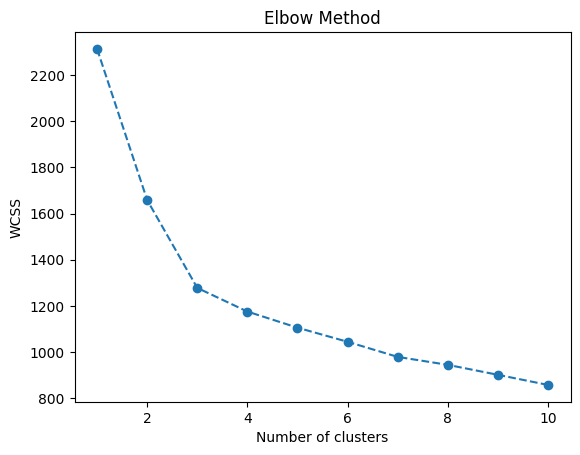

In [173]:
# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=69)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [174]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=69)
y_kmeans = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [176]:
print('Cluster centers:')
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster centers:
[[1.36767742e+01 1.99790323e+00 2.46629032e+00 1.74629032e+01
  1.07967742e+02 2.84758065e+00 3.00322581e+00 2.92096774e-01
  1.92209677e+00 5.45354839e+00 1.06548387e+00 3.16338710e+00
  1.10022581e+03]
 [1.31341176e+01 3.30725490e+00 2.41764706e+00 2.12411765e+01
  9.86666667e+01 1.68392157e+00 8.18823529e-01 4.51960784e-01
  1.14588235e+00 7.23470586e+00 6.91960784e-01 1.69666667e+00
  6.19058824e+02]
 [1.22509231e+01 1.89738462e+00 2.23123077e+00 2.00630769e+01
  9.27384615e+01 2.24769231e+00 2.05000000e+00 3.57692308e-01
  1.62415385e+00 2.97307692e+00 1.06270769e+00 2.80338462e+00
  5.10169231e+02]]


In [180]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


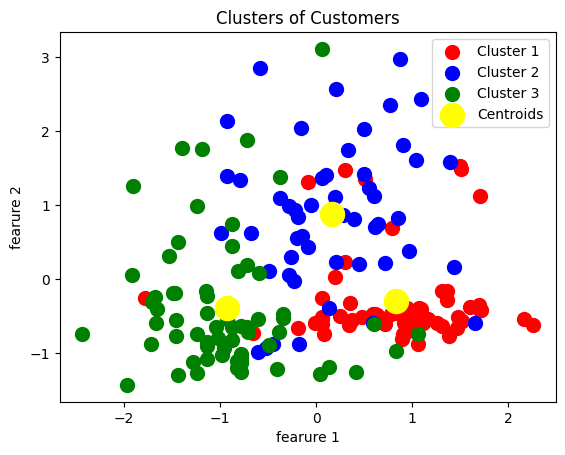

In [181]:
plt.scatter(data_scaled[y_kmeans == 0, 0],data_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1, 0],data_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2, 0],data_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('fearure 1')
plt.ylabel('fearure 2')
plt.legend()